In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/DS-Project-Doaa FATHALLAH-FIN 2/crypto-forecasting-bitcoin-dataset.csv')


In [8]:
import numpy as np

df_dirty = df.copy()
np.random.seed(42)
for col in ['Open','High','Low','Close','Volume']:
    df_dirty.loc[df_dirty.sample(frac=0.05).index, col] = np.nan


In [11]:
from sklearn.impute import SimpleImputer

X = df_dirty[['Open','High','Low','Close','Volume']]
imputer = SimpleImputer(strategy='mean')
X_clean = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Add back the date if needed
X_clean['Date'] = df_dirty['Timestamp']
X_clean.head()

,Open,High,Low,Close,Volume,Date
0,4.580000,4.580000,4.580000,4.58,0.000000,1.325412e+09
1,4.580000,21393.550578,4.580000,4.58,0.000000,1.325412e+09
2,21383.531535,21393.550578,4.580000,4.58,0.000000,1.325412e+09
3,4.580000,4.580000,4.580000,4.58,0.000000,1.325412e+09
4,4.580000,4.580000,21378.941745,4.58,5.124729,1.325412e+09


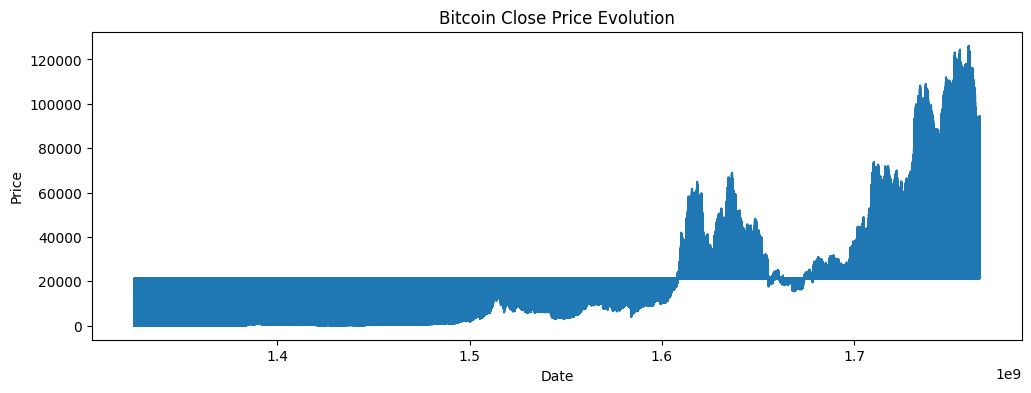

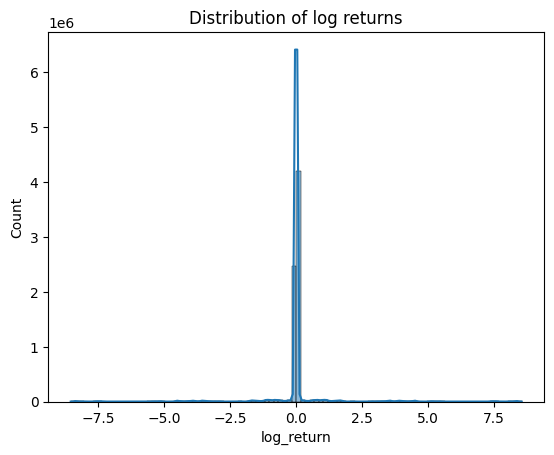

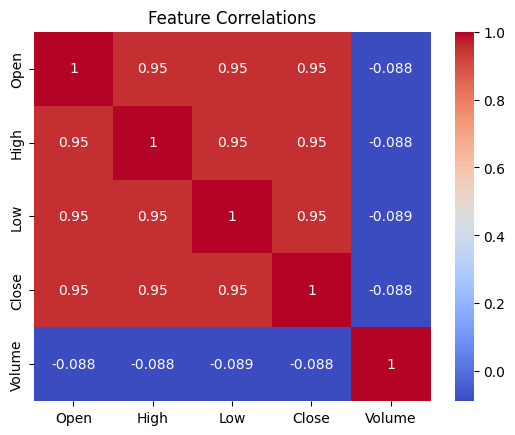

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price evolution
plt.figure(figsize=(12,4))
plt.plot(X_clean['Date'], X_clean['Close'])
plt.title('Bitcoin Close Price Evolution')
plt.xlabel('Date'); plt.ylabel('Price')
plt.show()

# Histogram of daily returns
X_clean['log_return'] = np.log(X_clean['Close']).diff()
sns.histplot(X_clean['log_return'].dropna(), bins=100, kde=True)
plt.title('Distribution of log returns')
plt.show()

# Correlation heatmap
sns.heatmap(X_clean[['Open','High','Low','Close','Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()


In [15]:
holdout = 180  # last 180 days as test
train = X_clean.iloc[:-holdout]
test = X_clean.iloc[-holdout:]

X_train = train.drop(columns=['Date','log_return'])
y_train = train['log_return']
X_test = test.drop(columns=['Date','log_return'])
y_test = test['log_return']


In [19]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np # Import numpy for sqrt

model = LGBMRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate MSE and then take the square root to get RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Test RMSE: {rmse:.5f}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.162100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 7331977, number of used features: 5
[LightGBM] [Info] Start training from score 0.000001
Test RMSE: 0.33509


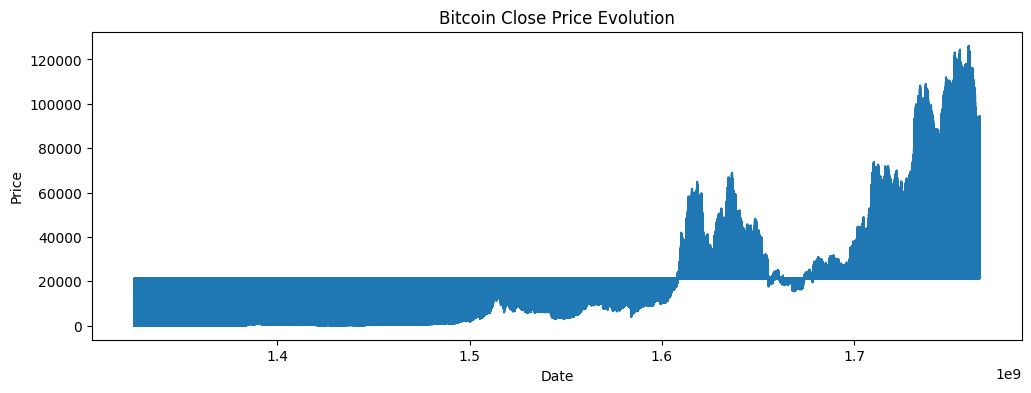

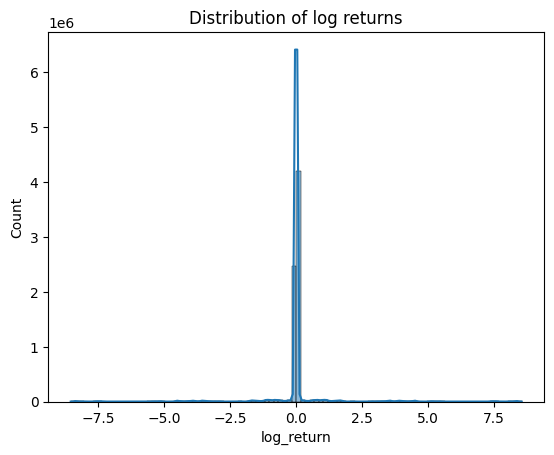

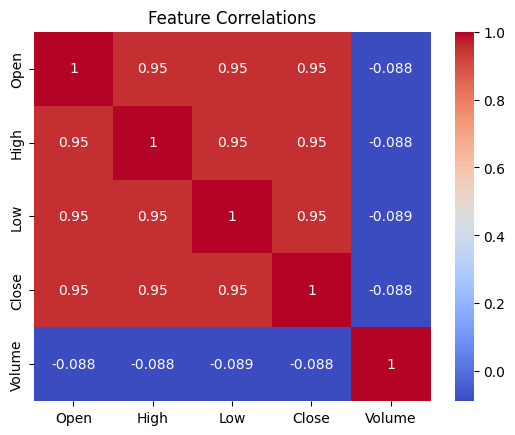

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Price evolution
plt.figure(figsize=(12,4))
plt.plot(X_clean['Date'], X_clean['Close'])
plt.title('Bitcoin Close Price Evolution')
plt.xlabel('Date'); plt.ylabel('Price')
plt.show()

# Histogram of daily returns
X_clean['log_return'] = np.log(X_clean['Close']).diff()
sns.histplot(X_clean['log_return'].dropna(), bins=100, kde=True)
plt.title('Distribution of log returns')
plt.show()

# Correlation heatmap
sns.heatmap(X_clean[['Open','High','Low','Close','Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()


In [22]:
holdout = 180  # last 180 days as test
train = X_clean.iloc[:-holdout]
test = X_clean.iloc[-holdout:]

X_train = train.drop(columns=['Date','log_return'])
y_train = train['log_return']
X_test = test.drop(columns=['Date','log_return'])
y_test = test['log_return']


In [25]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np # Import numpy for sqrt

model = LGBMRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate MSE and then take the square root to get RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Test RMSE: {rmse:.5f}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.188000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 7331977, number of used features: 5
[LightGBM] [Info] Start training from score 0.000001
Test RMSE: 0.33509


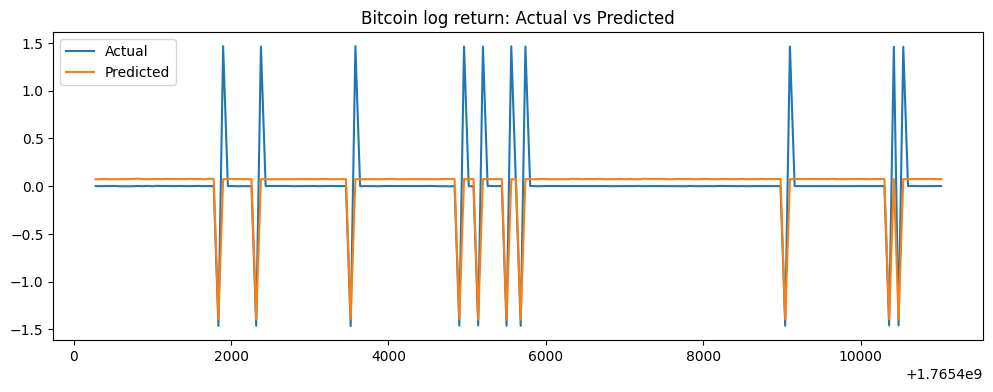

In [26]:
plt.figure(figsize=(12,4))
plt.plot(test['Date'], y_test, label='Actual')
plt.plot(test['Date'], y_pred, label='Predicted')
plt.title('Bitcoin log return: Actual vs Predicted')
plt.legend()
plt.show()


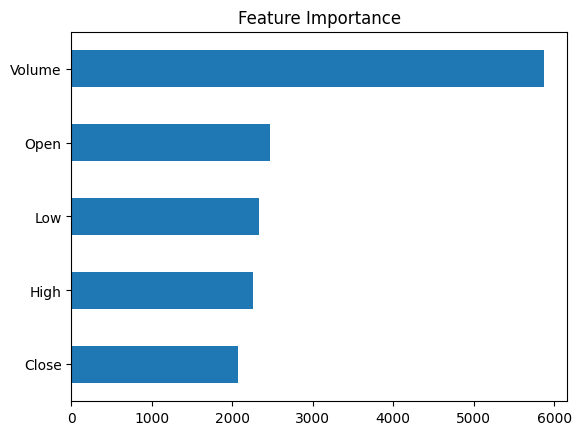

In [27]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances.plot(kind='barh'); plt.gca().invert_yaxis(); plt.title('Feature Importance')
plt.show()
